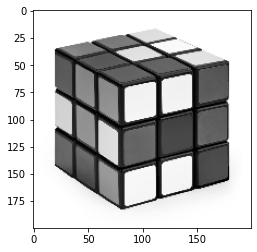

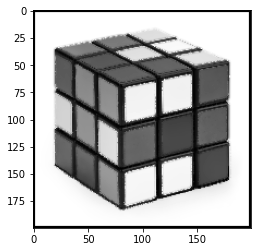

In [6]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

path = 'rubs cube.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (200, 200))
height, width = img.shape
kernel_size = 5
sigma = kernel_size/5
kernel = np.zeros((kernel_size, kernel_size))
st = kernel.shape[0]//2
ed = kernel.shape[1]//2

def gaussian_filter(x, y, sigma):
  return math.exp(-(x**2+y**2)/(2*sigma**2))
for i in range(-st, st+1):
  for j in range(-ed, ed+1):
    kernel[i+st][j+ed] = gaussian_filter(i, j, sigma)
kernel = kernel/kernel.sum()

def second_kernal(x, y):
    sigma=1
    kernal2 = np.zeros((kernel_size, kernel_size))
    for i in range(-st, st+1):
        for j in range(-ed, ed+1):
            intensity_diff = abs(img[x,y] - img[x+i,y+j])
            kernal2[st+i][ed+j] = math.exp(-(intensity_diff**2)/(2*sigma**2))
    return kernal2

result = np.zeros((height, width), dtype=np.float32)
for x in range(st, height-st):
  for y in range(ed, width-ed):
      final_kernal = kernel*second_kernal(x, y)
      final_kernal = final_kernal/final_kernal.sum()
      imagePixel = img[x-st:x+st+1, y-ed:y+ed+1]
      result[x,y] = np.sum(imagePixel*final_kernal)
from skimage.exposure import rescale_intensity
result = rescale_intensity(result, in_range=(0, 255))
plt.imshow(img, "gray")